In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__path__

['D:\\anaconda\\lib\\site-packages\\tensorflow\\python\\keras\\api\\_v1',
 'D:\\anaconda\\lib\\site-packages\\tensorflow_estimator\\python\\estimator\\api\\_v1',
 'D:\\anaconda\\lib\\site-packages\\tensorflow\\_api\\v2\\compat\\v1']

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print('train: ', mnist.train.num_examples)
print('validation: ', mnist.validation.num_examples)
print('test: ', mnist.test.num_examples)
print('train image: ', mnist.train.images.shape)
print('train label: ', mnist.train.labels.shape)
print(len(mnist.train.images[0]))
print(mnist.train.images[0])

train:  55000
validation:  5000
test:  10000
train image:  (55000, 784)
train label:  (55000, 10)
784
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

In [5]:
import matplotlib.pyplot as plt 
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show

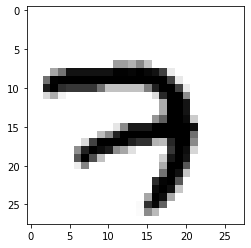

In [6]:
plot_image(mnist.train.images[0])

In [7]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
import numpy as np
np.argmax(mnist.train.labels[0])

7

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, i+1)
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap='binary')
        title= "label=" + str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=" ,predict="+str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

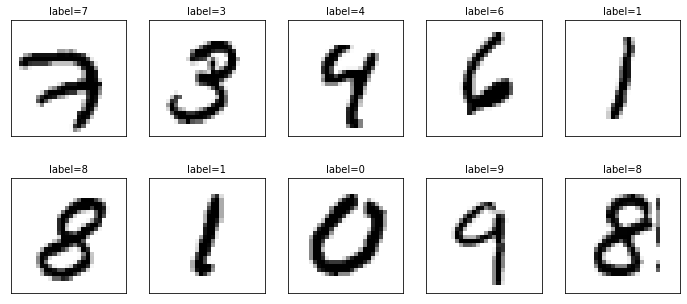

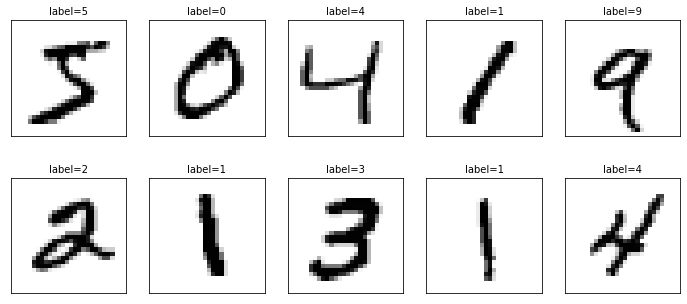

In [10]:
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)
plot_images_labels_prediction(mnist.validation.images, mnist.validation.labels, [], 0)

In [11]:
print('validation images: ', mnist.validation.images.shape)
print('labels: ', mnist.validation.labels.shape)
print('test images: ', mnist.test.images.shape)
print('labels: ', mnist.test.labels.shape)

validation images:  (5000, 784)
labels:  (5000, 10)
test images:  (10000, 784)
labels:  (10000, 10)


In [12]:
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=100)
print(len(batch_images_xs), len(batch_labels_ys))

100 100


In [13]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')

In [14]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

In [15]:
def con2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [16]:
def max_pool_2X2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [17]:
with tf.name_scope('Input_Layer'):
    x=tf.placeholder("float", shape=[None, 784], name='x')
    x_image = tf.reshape(x, [-1, 28, 28, 1])

In [18]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=con2d(x_image, W1)+b1
    C1_conv=tf.nn.relu(Conv1)

In [19]:
with tf.name_scope('C1_Pool'):
    C1_Pool=max_pool_2X2(C1_conv)

In [20]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=con2d(C1_Pool, W2)+b2
    C2_conv=tf.nn.relu(Conv2)

In [21]:
with tf.name_scope('C2_Pool'):
    C2_Pool=max_pool_2X2(C2_conv)

In [22]:
with tf.name_scope('D_Flat'):
    D_Flat= tf.reshape(C2_Pool, [-1, 1764])

In [23]:
with tf.name_scope('D_Hidden_Layer'):
    W3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=0.8)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128, 10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4)+b4)

In [25]:
with tf.name_scope('Optimizer'):
    y_label=tf.placeholder("float", [None, 10])
    loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [26]:
with tf.name_scope('evaluate_model'):
    correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [27]:
trainEpochs=30
batchSize=100
totalBatches=int(mnist.train.num_examples/batchSize)
epoch_list=[];loss_list=[];accuracy_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(trainEpochs):
    for i in range(totalBatches):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    
    epoch_list.append(epoch);loss_list.append(loss);accuracy_list.append(acc)
    print("Train Epoch: ", '%0.2d' % (epoch+1), "Loss=", "{:.9f}".format(loss), "Accuracy=", acc)
    
duration = time()-startTime
print("Train Finished takes :", duration)

Train Epoch:  01 Loss= 1.502537727 Accuracy= 0.961
Train Epoch:  02 Loss= 1.484317183 Accuracy= 0.9802
Train Epoch:  03 Loss= 1.481561303 Accuracy= 0.98
Train Epoch:  04 Loss= 1.479884982 Accuracy= 0.982
Train Epoch:  05 Loss= 1.476677299 Accuracy= 0.9856
Train Epoch:  06 Loss= 1.474453688 Accuracy= 0.9872
Train Epoch:  07 Loss= 1.476288438 Accuracy= 0.9858
Train Epoch:  08 Loss= 1.477703571 Accuracy= 0.9838
Train Epoch:  09 Loss= 1.475071669 Accuracy= 0.986
Train Epoch:  10 Loss= 1.473185420 Accuracy= 0.9882
Train Epoch:  11 Loss= 1.472042441 Accuracy= 0.9892
Train Epoch:  12 Loss= 1.472913980 Accuracy= 0.9882
Train Epoch:  13 Loss= 1.472037315 Accuracy= 0.9894
Train Epoch:  14 Loss= 1.471602678 Accuracy= 0.9898
Train Epoch:  15 Loss= 1.472973585 Accuracy= 0.988
Train Epoch:  16 Loss= 1.472142220 Accuracy= 0.9892
Train Epoch:  17 Loss= 1.473046541 Accuracy= 0.9884
Train Epoch:  18 Loss= 1.473123908 Accuracy= 0.9882
Train Epoch:  19 Loss= 1.472359061 Accuracy= 0.989
Train Epoch:  20 Lo

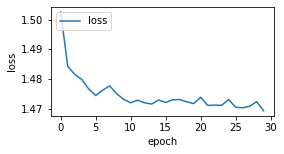

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc= 'upper left')

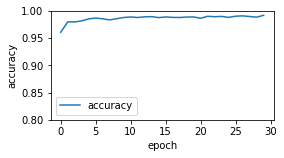

In [29]:
plt.plot(epoch_list, accuracy_list, label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.ylim(0.8, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [30]:
print("Accuracy: ", sess.run(accuracy, feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))

Accuracy:  0.9906


In [31]:
prediction_result= sess.run(tf.argmax(y_predict, 1), feed_dict={x:mnist.test.images})

In [32]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

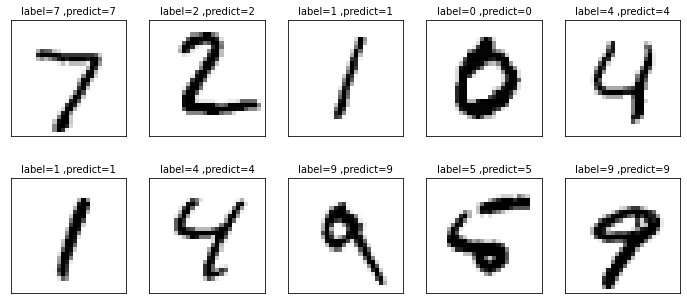

In [33]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

In [ ]:
#TensorBoard